# Hash Functions

### Properties of a good hash function

*  Should have an even distribution
*  Should produce unique numbers for every input
*  Should be very fast to compute




In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import math
from collections import Counter

In [24]:
allwords = open('/usr/share/dict/words').readlines()

In [25]:
def hash1(s):
    sum = 0
    for ch in s:
        sum += ord(ch)
    return sum

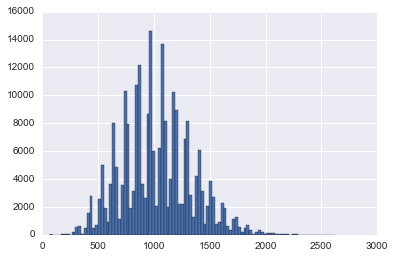

In [33]:
hashvals = [hash1(w[:-1]) for w in allwords]
p = plt.hist(hashvals,bins=100)

In [27]:
max(Counter(hashvals).values())

623

In [28]:
def hash2(s):
    sum = 0
    for i, ch in enumerate(s):
        sum += ord(ch)*(i+1)
    return sum

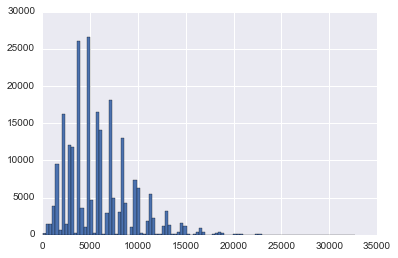

In [39]:
hashvals = [hash2(w[:-1]) for w in allwords]
p = plt.hist(hashvals,bins=100)

In [40]:
max(Counter(hashvals).values())

140

In [34]:
def hash3(s):
    sum = 5381
    for ch in s:
        sum = ((sum << 5) + sum ) + ord(ch) 
    return sum

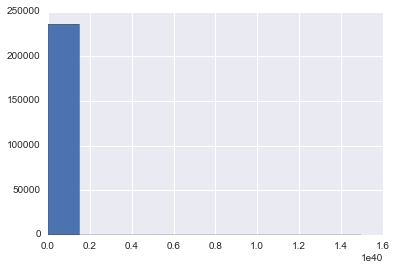

In [37]:
hashvals = [hash3(w[:-1]) for w in allwords]
p = plt.hist(hashvals)

In [9]:
def hash4(s):
    sum = 0
    for ch in s:
        sum = ((sum << 6) + (sum << 16) ) + ord(ch)  - sum
    return sum

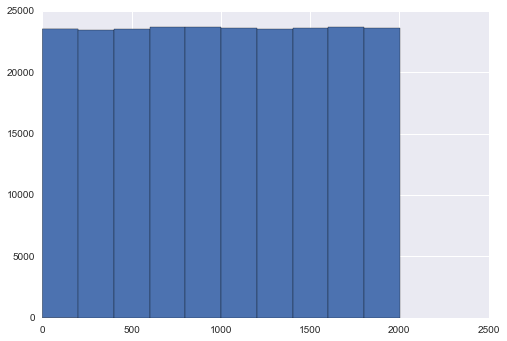

In [10]:
hashvals = [hash4(w[:-1])%2003 for w in allwords]
p = plt.hist(hashvals)

In [11]:
def hash5(s):
    A = (math.sqrt(5) - 1)/2
    h = 0
    for ch in s:
        h += ord(ch)
        
    return math.floor(103319 * (h * A % 1))

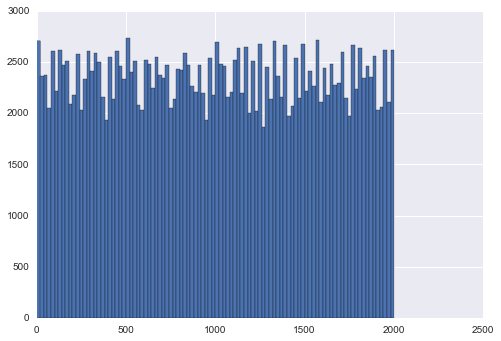

In [12]:
hashvals = [hash5(w[:-1])%2003 for w in allwords]
p = plt.hist(hashvals,bins=100)

In [13]:
c = Counter(hashvals)
max(c.values())

642

# Bonus -- Cryptographic Hashing

### MD5 Algorithm

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/MD5.svg/800px-MD5.svg.png" height="400"></img>

![](https://upload.wikimedia.org/math/6/9/c/69cdb05ce2b8710bd61e8e6fc5b583a7.png)


In [14]:
import hashlib

#hash6.update("foo".encode('utf8'))
#int(hash6.hexdigest(),16)

def hash7(s):
    hash6 = hashlib.md5()
    hash6.update(s.encode('utf8'))
    return int(hash6.hexdigest(),16)

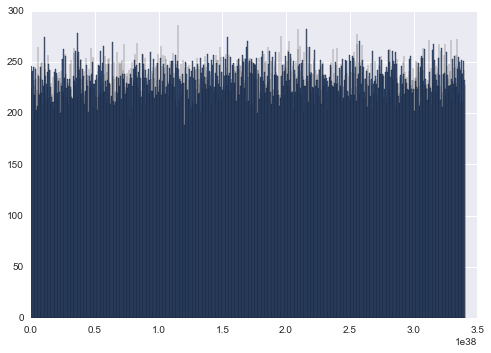

In [15]:
hashvals = [hash7(w[:-1]) for w in allwords]
p = plt.hist(hashvals,bins=1000)

In [16]:
c = Counter(hashvals)
max(c.values())

1

### OK, but what is the chance that md5 collides two words?

#### The Birthday Problem...


In [17]:
# numHashes = float(2 ** 128)
# current = numHashes-1
# i = 0
# done = False
# notp = 1
# while not done:
#     
#     notp =  notp * current/numHashes
#     if 1 - notp >= 0.01:
#         print("probability is 1% after {} tries".format(i))
#         done = True
#     if i % 1000 == 0:
#         print(notp)
#     i += 1

See here for a nice table of probabilities https://en.wikipedia.org/wiki/Birthday_attack

In [12]:
# We can estimate the expected number of values before the first collision as follows:
import math
math.sqrt(math.pi/2*(2**128))

2.31195651350211e+19